# Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a dimensionality reduction technique used to transform high-dimensional data into a lower-dimensional space while retaining as much of the original variance as possible. It achieves this by finding new uncorrelated variables, called principal components, that are linear combinations of the original variables.

**Steps of PCA:**

1.  **Standardize the data:** Scale the data so that each feature has a mean of 0 and a standard deviation of 1. This is crucial because PCA is sensitive to the scale of the features. This is done using `StandardScaler` from `sklearn.preprocessing`.

2.  **Calculate the covariance matrix:** Compute the covariance matrix of the standardized data. The covariance matrix summarizes the relationships between different features. This is done using `np.cov()`. There are two ways to do this:
    *   `np.cov(X, rowvar=False)`: Assumes rows are observations and columns are variables.
    *   `np.cov(X.T)`: Transposes the data first, then calculates the covariance, assuming rows of the *transposed* matrix are variables. Both methods are mathematically equivalent.

3.  **Compute eigenvalues and eigenvectors:** Perform eigendecomposition of the covariance matrix to find its eigenvalues and eigenvectors. Eigenvectors represent the directions of maximum variance in the data, and eigenvalues represent the magnitude of the variance along those directions. This is done using `np.linalg.eig()`.

4.  **Sort eigenvalues and eigenvectors:** Sort the eigenvalues in descending order and arrange the eigenvectors accordingly. This ensures that the principal components are ordered by the amount of variance they explain.

5.  **Select principal components:** Choose the top *k* eigenvectors corresponding to the *k* largest eigenvalues, where *k* is the desired number of dimensions in the reduced space. These *k* eigenvectors are the principal components.

6.  **Project the data:** Project the original data onto the selected principal components by taking the dot product of the centered data and the matrix of principal components. This results in the reduced-dimensional representation of the data.

7.  **Calculate Explained Variance Ratio:** The explained variance ratio gives the proportion of the dataset's variance that lies along the direction of each principal component. This is calculated by dividing the eigenvalues of each principal component by the total variance (sum of all eigenvalues). This is very important to determine how many principal components are necessary to retain most of the information.

**Comparison with scikit-learn's PCA:**

In this notebook, we have implemented PCA from scratch and compared the results with scikit-learn's highly optimized `PCA` implementation from `sklearn.decomposition`. We compared the explained variance ratio and the resulting 2D projections of the data. The sign of the eigenvectors is ambiguous, so we compare the absolute values of the eigenvectors and align the signs of the principal components in the plotting step to ensure visual consistency. The results from our scratch implementation should be very close to (or identical to, up to numerical precision) the results from scikit-learn's PCA.

Explained variance ratio (from scratch): [0.44272026 0.18971182]
Total explained variance (from scratch): 0.6324320765155949
Explained variance ratio (sklearn): [0.44272026 0.18971182]
Total explained variance (sklearn): 0.6324320765155946


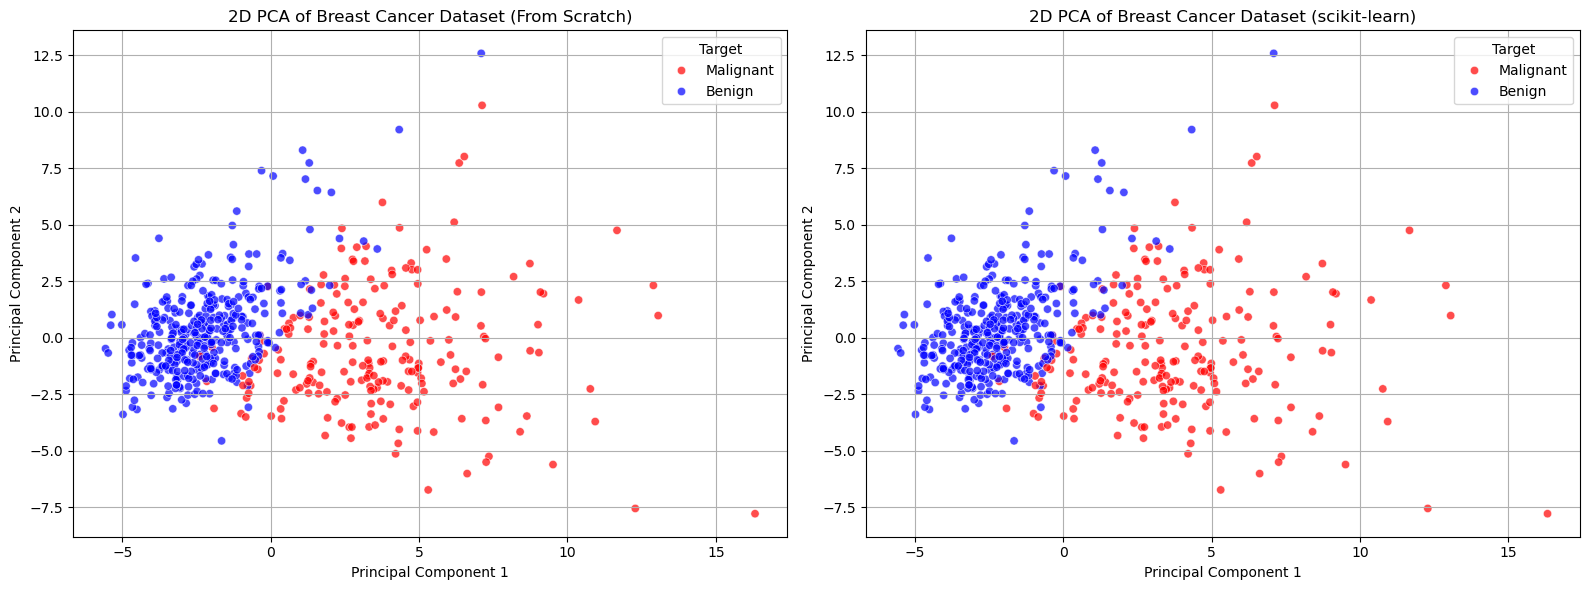

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def pca(data, n_components):
    # Compute the covariance matrix
    covariance_matrix = np.cov(data.T)

    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Sort eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Select the top n_components
    selected_vectors = eigenvectors[:, :n_components]

    # Project the data onto the selected eigenvectors
    reduced_data = np.dot(data, selected_vectors)

    # Correct calculation of explained variance ratio
    total_variance = np.sum(eigenvalues)  # Sum of ALL eigenvalues
    explained_variance_ratio = eigenvalues[:n_components] / total_variance

    return reduced_data, explained_variance_ratio

# Load data, scale it
data = load_breast_cancer()
X = data.data
y = data.target
target_names = {0: 'Malignant', 1: 'Benign'}
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
n_components = 2

# Apply PCA from scratch
reduced_data, explained_variance_ratio = pca(X_scaled, n_components)

# Apply sklearn's PCA
pca_sklearn = PCA(n_components=n_components)
X_pca_sklearn = pca_sklearn.fit_transform(X_scaled)
explained_variance_ratio_sklearn = pca_sklearn.explained_variance_ratio_

print(f"Explained variance ratio (from scratch): {explained_variance_ratio}")
print(f"Total explained variance (from scratch): {sum(explained_variance_ratio)}")
print(f"Explained variance ratio (sklearn): {explained_variance_ratio_sklearn}")
print(f"Total explained variance (sklearn): {sum(explained_variance_ratio_sklearn)}")


# Create DataFrames and plot (using np.sign to align the plots)
df_pca_scratch = pd.DataFrame(reduced_data, columns=[f'PC{i+1}' for i in range(n_components)])
df_pca_scratch['Target'] = [target_names[label] for label in y]

df_pca_sklearn = pd.DataFrame(X_pca_sklearn, columns=[f'PC{i+1}' for i in range(n_components)])
df_pca_sklearn['Target'] = [target_names[label] for label in y]

# Plot the PCA results
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot PCA from scratch
sns.scatterplot(x='PC1', y='PC2', hue='Target', data=df_pca_scratch, palette=['red', 'blue'], alpha=0.7, ax=axes[0])
axes[0].set_xlabel("Principal Component 1")
axes[0].set_ylabel("Principal Component 2")
axes[0].set_title("2D PCA of Breast Cancer Dataset (From Scratch)")
axes[0].grid(True)

# Plot sklearn's PCA
sns.scatterplot(x='PC1', y='PC2', hue='Target', data=df_pca_sklearn, palette=['red', 'blue'], alpha=0.7, ax=axes[1])
axes[1].set_xlabel("Principal Component 1")
axes[1].set_ylabel("Principal Component 2")
axes[1].set_title("2D PCA of Breast Cancer Dataset (scikit-learn)")
axes[1].grid(True)

plt.tight_layout()
plt.show()
